# Format Results

In [275]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retain_results = "results/qwen2-1.5b_ft_DS_noLORA_lr1.5e-05_checkpoint-618_retain99_forget01_perturbed.csv"
df_retain = pd.read_csv(retain_results)

full_results = "results/qwen2-1.5b_ft_DS_noLORA_lr1.5e-05_checkpoint-625_full_forget01_perturbed.csv"
df_full = pd.read_csv(full_results)
df_full['Method'] = '0'

In [287]:
def get_results(exp_name):
    folder = f"results/sept03_experiments/{exp_name}"
    files = os.listdir(folder)
    files = [f for f in files if re.match(r".*\.csv", f)]
    df = df_full
    for f in files:
        pth = os.path.join(folder, f)
        tmp = pd.read_csv(pth)
        # replace "Method" column with layer.#
        step_num = tmp['Method'].values[0].split("_")[1].split("-")[1]
        tmp['Method'] = step_num
        df = pd.concat([df, tmp])
    df = df.reset_index(drop=True)
    return df

In [288]:
results_ = [
    # sept03_experiments/
    "performance_over_time_3e-05_all(-layers.1,layers.2)_grad-ascent",
    "performance_over_time_5e-05_all(-layers.1,layers.2)_grad-ascent",
    "performance_over_time_0,12,26_grad-ascent",
    "performance_over_time_0,12,26_grad-diff",
    "performance_over_time_k0.1_5e-05_mlp,attn_False",
    "performance_over_time_k0.1_5e-05_mlp,attn_True",
    "performance_over_time_k0.1_5e-05_mlp,attn_True2",
    "performance_over_time_k-0.1_5e-05_mlp,attn_False",
    "performance_over_time_k0.1_8e-05_mlp,attn_False",
    "performance_over_time_k0.1_5e-05_mlp_False",
    "performance_over_time_k0.1_5e-05_mlp,attn_False_sophia",
]

In [289]:
dfs = [get_results(r) for r in results_]

In [290]:
def best_step(experiment):
    # find the closest step to the ideal values
    df = experiment
    df['diff_retain'] = abs(df['ROUGE Retain'] - df_retain['ROUGE Retain'].values[0]) ** 2
    df['diff_forget'] = abs(df['ROUGE Forget'] - df_retain['ROUGE Forget'].values[0]) ** 2
    df['diff'] = np.sqrt(df['diff_retain'] + df['diff_forget'])
    idx = df['diff'].idxmin()
    return int(df.loc[idx]['Method']), df.loc[idx]['diff']

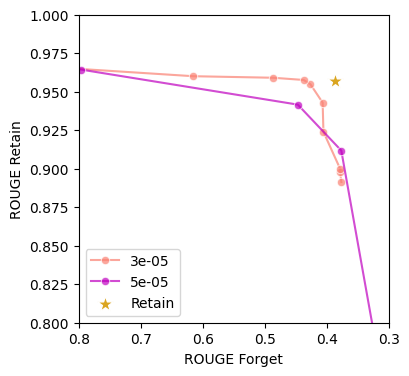

In [291]:
fig, ax = plt.subplots(figsize=(4, 4))

sizes = list(range(20, 2, -2))

sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[0], ax=ax, marker="o", c="salmon", alpha=0.7, label="3e-05")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[1], ax=ax, marker="o", c="m", alpha=0.7, label="5e-05")
sns.scatterplot(x="ROUGE Forget", y="ROUGE Retain", data=df_retain, ax=ax, marker="*", s=150, c="goldenrod", alpha=1, zorder=2, label="Retain")
# sns.scatterplot(x="ROUGE Forget", y="ROUGE Retain", data=df_full, ax=ax, marker="o", c="blue", alpha=1, zorder=2)

plt.legend(loc='lower left')

plt.xlim(0.8, 0.3)
plt.ylim(0.8, 1)

plt.show()

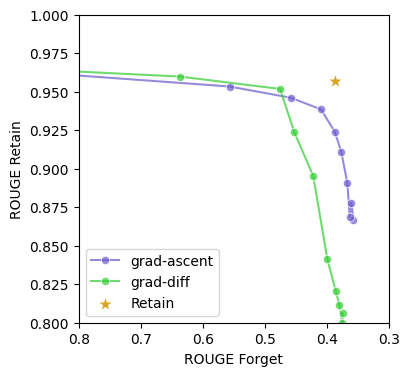

In [263]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[2], ax=ax, marker="o", c="slateblue", alpha=0.7, label="grad-ascent")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[3], ax=ax, marker="o", c="limegreen", alpha=0.7, label="grad-diff")
sns.scatterplot(x="ROUGE Forget", y="ROUGE Retain", data=df_retain, ax=ax, marker="*", s=150, c="goldenrod", alpha=1, zorder=2, label="Retain")
# sns.scatterplot(x="ROUGE Forget", y="ROUGE Retain", data=df_full, ax=ax, marker="o", c="blue", alpha=1, zorder=2)

plt.legend(loc='lower left')

plt.xlim(0.8, 0.3)
plt.ylim(0.8, 1)

plt.show()

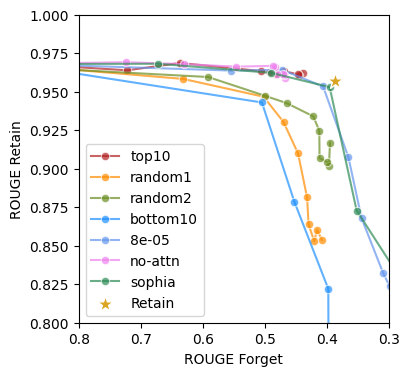

In [262]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[4], ax=ax, marker="o", c="firebrick", alpha=0.7, label="top10")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[5], ax=ax, marker="o", c="darkorange", alpha=0.7, label="random1")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[6], ax=ax, marker="o", c="olivedrab", alpha=0.7, label="random2")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[7], ax=ax, marker="o", c="dodgerblue", alpha=0.7, label="bottom10")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[8], ax=ax, marker="o", c="cornflowerblue", alpha=0.7, label="8e-05")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[9], ax=ax, marker="o", c="violet", alpha=0.7, label="no-attn")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[10], ax=ax, marker="o", c="seagreen", alpha=0.7, label="sophia")
sns.scatterplot(x="ROUGE Forget", y="ROUGE Retain", data=df_retain, ax=ax, marker="*", s=150, c="goldenrod", alpha=1, zorder=2, label="Retain")
# sns.scatterplot(x="ROUGE Forget", y="ROUGE Retain", data=df_full, ax=ax, marker="o", c="blue", alpha=1, zorder=2)

plt.legend(loc='lower left')

plt.xlim(0.8, 0.3)
plt.ylim(0.8, 1)

plt.show()

In [260]:
cs = ['salmon', 'm', 'slateblue', 'limegreen', 'firebrick', 'darkorange', 'olivedrab', 'dodgerblue', 'cornflowerblue', 'violet', 'seagreen']

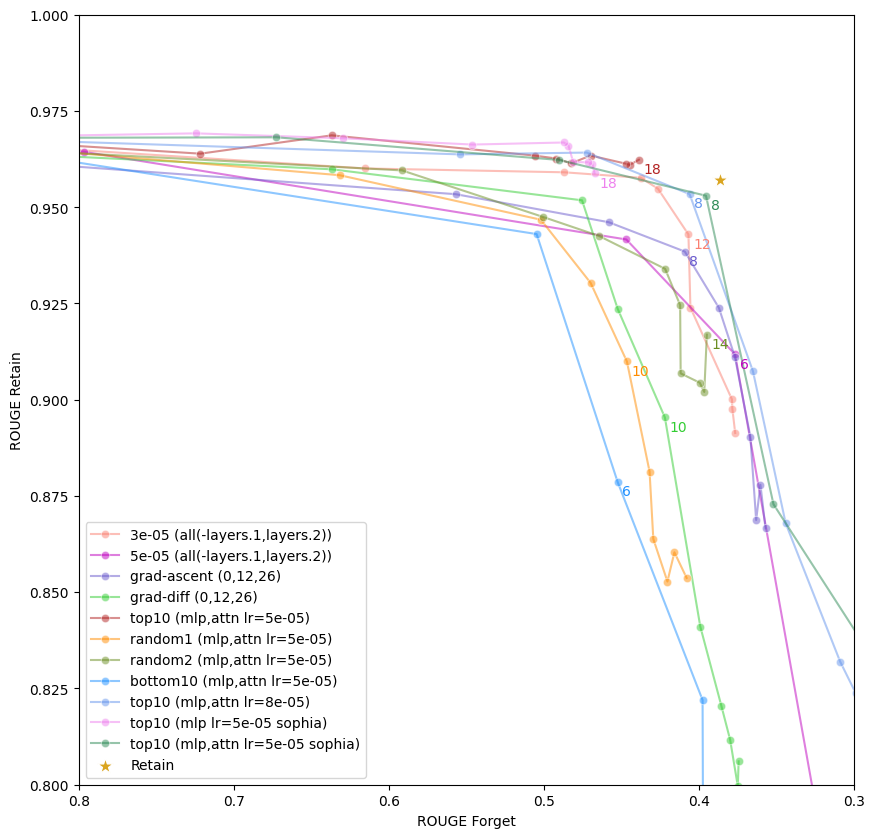

In [286]:
fig, ax = plt.subplots(figsize=(10, 10))

alpha = 0.5

sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[0], ax=ax, marker="o", c="salmon", alpha=alpha, label="3e-05 (all(-layers.1,layers.2))")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[1], ax=ax, marker="o", c="m", alpha=alpha, label="5e-05 (all(-layers.1,layers.2))")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[2], ax=ax, marker="o", c="slateblue", alpha=alpha, label="grad-ascent (0,12,26)")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[3], ax=ax, marker="o", c="limegreen", alpha=alpha, label="grad-diff (0,12,26)")

sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[4], ax=ax, marker="o", c="firebrick", alpha=alpha, label="top10 (mlp,attn lr=5e-05)")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[5], ax=ax, marker="o", c="darkorange", alpha=alpha, label="random1 (mlp,attn lr=5e-05)")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[6], ax=ax, marker="o", c="olivedrab", alpha=alpha, label="random2 (mlp,attn lr=5e-05)")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[7], ax=ax, marker="o", c="dodgerblue", alpha=alpha, label="bottom10 (mlp,attn lr=5e-05)")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[8], ax=ax, marker="o", c="cornflowerblue", alpha=alpha, label="top10 (mlp,attn lr=8e-05)")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[9], ax=ax, marker="o", c="violet", alpha=alpha, label="top10 (mlp lr=5e-05 sophia)")
sns.lineplot(x="ROUGE Forget", y="ROUGE Retain", data=dfs[10], ax=ax, marker="o", c="seagreen", alpha=alpha, label="top10 (mlp,attn lr=5e-05 sophia)")

sns.scatterplot(x="ROUGE Forget", y="ROUGE Retain", data=df_retain, ax=ax, marker="*", s=150, c="goldenrod", alpha=1, zorder=2, label="Retain")
# sns.scatterplot(x="ROUGE Forget", y="ROUGE Retain", data=df_full, ax=ax, marker="o", c="blue", alpha=1, zorder=2)

best_steps = [best_step(d)[0] for d in dfs]
for idx, d in enumerate(dfs):
    df_idx = best_steps[idx]
    # place text on bottom left of point
    ax.text(d["ROUGE Forget"][df_idx//2]-0.003, d["ROUGE Retain"][df_idx//2]-0.0035, f"{df_idx}", fontsize=10, color=cs[idx], alpha=1)#, ha='right', va='top')

plt.legend(loc='lower left')

plt.xlim(0.8, 0.3)
plt.ylim(0.8, 1)

plt.show()

# save
# fig.savefig("figures/pareto_frontier_initial_plot.svg", format="svg")